### Notebook for Exercise Sheet 5:
# Least-square Regression and Regularization

This notebook is about regularized empirical risk minimization. The focus is on getting some impressions how the regularization parameter affects the computed approximation. Note that points are only given for correctly running code and meaningfull plots. At the end of the notebook you find some tests which you can use to check your code.

In [2]:
# some basic setup
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt

# add your required imports here

## The toy data
Below you see the toy function which you will approximate in the following, $10$ samples (red dots), and the same $10$ samples heavily corrupted by strong noise.

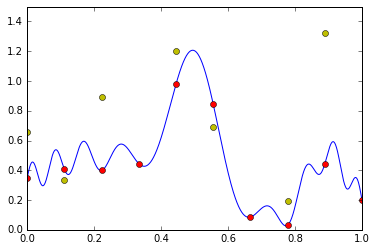

In [4]:
def toy(x):
    return np.exp(-100*np.power(x-0.5,2)) +\
           0.5*np.exp(-10*np.power(x-0.2,2)) +\
           0.5*np.exp(-100*np.power(x-0.9,2)) +\
           0.1*np.sin(-100*np.power(x-0.5,2))

X_full   = np.linspace(0,1,1000)
X_sample = np.linspace(0,1,10)

heavy_noise = [ 0.31006098, -0.06900007,  0.49688356,  1.20370015,  0.2254434,  -0.15198685,
 -0.93082213,  0.16441064,  0.87895284, -0.52823194]

toy_observed = toy(X_sample)
toy_noisy = toy_observed + heavy_noise

plt.ylim([0,1.5])
plt.plot(X_full,toy(X_full))
plt.plot(X_sample,toy_observed, 'or')
plt.plot(X_sample,toy_noisy, 'oy')

## Regularized least-squares regression

### Task 1: Eigenvalue decomposition
Implement subroutines for the Gauss kernel
$$
 k = k_\gamma(x,y) = \exp(-\gamma \|x-y\|_2^2)
$$
and the Dirichlet kernel
$$
 k = D_m(x,y) = \frac{\sin((m+1/2)(x-y))}{\sin((x-y)/2)},
$$
which compute the matrix $(k(x,y))_{x \in X, y \in Y}$ for two collections of points $X$ and $Y$. You can reuse code which you have written for the previous notebook. Moreover, you can use routines from <a href="http://scikit-learn.org/stable/index.html">scikit-learn</a> for kernel evaluations.

In [ ]:
def gauss_kernel(X, Y, gamma):
    """
    Evaluates the Gauss kernel k(x,y) = exp(-gamma \|x-y\|_2^2) with width gamma
    in all tuples (x,y), x in X, y in Y.
    
    Parameters:
        X - array-like with N elements
        Y - array-like with M elements
        gamma - float
        
    Returns:
        keval - matrix or ndarray of shape (N,M)
    """
    # your code goes here


def dirichlet_kernel(X, Y, m):
    """
    Evaluates the Gauss kernel Dirichlet kernel D_m(x,y) = sin((m+0.5)*(x-y))/sin(0.5*(x-y)
    in all tuples (x,y), x in X, y in Y.
    
    Parameters:
        X - array-like with N elements
        Y - array-like with M elements
        gamma - float
        
    Returns:
        keval - matrix or ndarray of shape (N,M)
    """
    # your code goes here

Next provide a routine which computes the eigenvalue decomposition of a given kernel matrix. You can use any <a href="http://www.numpy.org/">numpy</a> or <a href="https://www.scipy.org/">scipy</a> routine to achieve this.

In [ ]:
def eigenvalue_decomposition(kernelmatrix):
    """
    Computes the eigenvalue decomposition for the given symmetric kernelmatrix.
    
    Parameters:
        kernelmatrix - array-like of shape (N,N)
        
    Returns:
        eigval -  array-like with N elements; the eigenvalues
        Q - matrix of shape (N,N); the normalized (unit “length”) eigenvectors,
            such that the column Q[:,i] is the eigenvector corresponding
            to the eigenvalue eigval[i].
    """
    # your code goes here

### Task 2: Regularized least-squares

Using the subroutines from Task 1, implement a subrotuine which numerically solves the regularized empirical risk minimization problem
$$
  \hat f_\lambda = \text{argmin}_{f \in H} \frac{1}{N} \sum_{i=1}^N (f(x_i) - y_i)^2 + \lambda \|f\|_H
$$
where $H$ is the reproducing kernel space associated to either the Gauss kernel $k_\gamma$ or the Dirichlet kernel $D_m$. Note that you are not allowed to use any scikit-learn routine which does the regression for you.

In [ ]:
def compute_predictor(kernel, eigval, Q, sample_points, sample_values, regparam):
    """
    Computes the function approximation obtained via regularized empirical risk minimization.
    
    Parameters:
        kernel - function object which takes two array-like arguments X and Y
        eigval - array-like with N elements; the eigenvalues
        Q      - matrix of shape (N,N); the normalized (unit “length”) eigenvectors,
                 such that the column Q[:,i] is the eigenvector corresponding
                 to the eigenvalue eigval[i].
        sample_points - given sampling points; array-like with N elements
        sample_values - values observed at the given sampling points
        regparam - float; the regularization parameter
        
    Returns:
       predictor - function object which takes an array-like argument X; predictor(X) returns
                   an array-like object containing the values of approximant
                   at the points X
    """
    # your code goes here

### Task 3: The regularization parameter

Consider the Gauss kernel with $\gamma = 100$. Generate eight plots arranged like
<table>
 <tr><td>Plot 1</td><td>Plot 2</td></tr>
 <tr><td>Plot 3</td><td>Plot 4</td></tr>
 <tr><td>Plot 5</td><td>Plot 6</td></tr>
 <tr><td>Plot 7</td><td>Plot 8</td></tr>
</table>
each showing: the toy function evaluated on <tt>X_full</tt>, the computed approximant $\hat f_{\lambda}$ evaluated on <tt>X_full</tt> and the used data points.

The plots int the first column are based on uncorrupted data, the plots in the second column on the given noisy data,

Row 1: $\lambda = 0.001$
Row 2: $\lambda = 0.1$
Row 3: $\lambda = 0.5$
Row 4: $\lambda = 1$

In [ ]:
# your code goes here

### Task 4: Dependency of the RMS on the regularization parameter

Consider the rooted mean square error (RMS)
$$
 \sqrt{\frac{1}{|X_{full}|} \sum_{x \in X_{full}} (f(x) - \hat f_\lambda(x))^2}
$$
where $f$ is the considered toy function and $\hat f_\lambda$ the approximation computed with regularization parameter $\lambda$. 
Generate four plots arranged like
<table>
 <tr><td>Plot 1</td><td>Plot 2</td></tr>
 <tr><td>Plot 3</td><td>Plot 4</td></tr>
</table>
where each plot shows two curves: one curve showing how the RMS depends on the regularization parameter $\lambda$ when uncorrupted observations <tt>toy_uncorrupted</tt> are used; and one curve showing the dependency for the very noisy observations <tt>toy_noisy</tt>.

Plot 1: Gauss kernel with $\gamma = 100$

Plot 2: Gauss kernel with $\gamma = 1$

Plot 3: Dirichlet kernel with $m = 10$

Plot 4: Dirichlet kernel with $m = 3$

As regularization parameters use the values
$$
 \lambda_i = 0.001 + \frac{1.5-0.0001}{100} i, \quad i=0,\dots,100
$$

In [ ]:
# your code goes here

# Tests

This section will be used by the tutor to check your code for correctness. Don't change any code here! You are free to run the tests below yourself to check your code.

### Tests for Task 1

In [ ]:
def test_kernel(kevaluator):
    kernelmatrix = kevaluator(X_sample1, X_sample1)
    keval = kevaluator(X_sample1, X_full)
    eigval, Q = eigenvalue_decomposition(kernelmatrix)
    print('\t Type checks: '+\
      str(isinstance(Q,np.matrixlib.defmatrix.matrix)))
    print('\t Shape tests: '+\
      str(kernelmatrix.shape == (X_sample1.size, X_sample1.size)) +' '+\
      str(keval.shape == (X_sample1.size, X_full.size)))
    print('\t Checking kernel matrix for symmetry: '+\
      str(np.allclose(kernelmatrix.transpose(),kernelmatrix)))
    print('\t Checking eigenvectors: '+\
      str(np.allclose(np.eye(X_sample1.size), Q.transpose()*Q)))
    print('\t Checking eigenvalue decomposition: '+\
      str(np.allclose(kernelmatrix, Q*np.diag(eigval)*Q.transpose())))
    
print('Testing the Gauss kernel:')
test_kernel(lambda X,Y: gauss_kernel(X,Y,1.0))

print('Test the Dirichlet kernel: ')
test_kernel(lambda X,Y: dirichlet_kernel(X,Y,1.0))

### Tests for Task 2

In [ ]:
kernel = lambda X, Y: gauss_kernel(X,Y,100)
kernelmatrix = kernel(X_sample, X_sample)
eigval, Q = eigenvalue_decomposition(kernelmatrix)
predictor = compute_predictor( kernel, eigval, Q, X_sample, toy_observed, 0.1)

target_values = [ 0.19781951,  0.24827233,  0.24460145,  0.30744904,  0.56295652,  0.48216615,
  0.09553423,  0.04689467,  0.22911141,  0.13006833]

print('Checking predictor: '+\
      str(np.allclose(target_values, predictor(X_sample))))